# q1

In [255]:
import pandas as pd

In [256]:
df=pd.read_csv('lab5q1.csv')

In [257]:
df

,mother height,daughter height
0,58,60
1,62,60
2,60,58
3,64,60
4,67,70
5,70,72


In [258]:
def mse(b0,b1,df):
    err=0
    

In [259]:
b0=0
b1=0
lr=0.0001
size=len(df)
for epoch in range (4):
    err=0
    sq_err=0
    fb1=0
    for m,d in zip(df['mother height'],df['daughter height']) :
        error=d-(b0+b1*m)
        err+=error
        sq_err+=(error)**2
        fb1+=error*m
        
    gradient_b0 = (-2 * err) / size
    gradient_b1 = (-2 * fb1) / size

    b0 -= lr * gradient_b0
    b1 -= lr * gradient_b1
    print(sq_err)



24248
915.1233432222222
72.50365075561442
42.07413663602844


In [260]:
b0

0.015588064669482742

In [261]:
b0+b1*63

62.8066433939152

In [262]:
b0=0
b1=0
lr=0.0001
for epoch in range(4):
    err_sum = 0
    sq_err_sum = 0
    
    for m,d in zip(df['mother height'],df['daughter height']) :

        prediction = b0 + b1 * m

        error = d - prediction

        err_sum += error
        sq_err_sum += error ** 2
        
        gradient_b0 = -2 * error
        gradient_b1 = -2 * error * m
 
        b0 -= lr * gradient_b0
        b1 -= lr * gradient_b1
     
    if epoch==3:
        print(err_sum)
        mse = sq_err_sum / size
        print(mse)
        rmse=np.sqrt(mse)
        print(rmse)

-0.43387921963251586
11.331932574143458
3.3662935959514075


In [263]:
b0+b1*63


64.80902518534934

In [264]:
import matplotlib.pyplot as plt

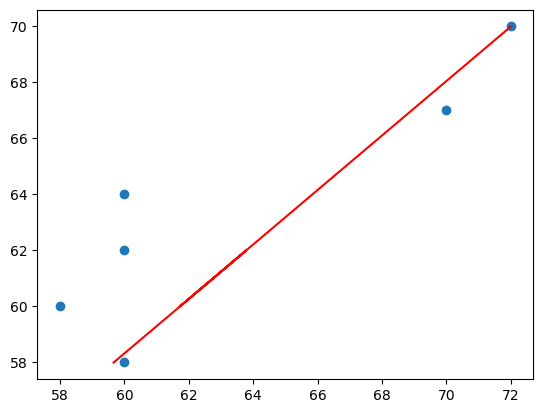

In [265]:
plt.scatter(df['daughter height'],df['mother height'])
plt.plot(b0+b1*df['mother height'],df['mother height'],color='red')

In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
model = LinearRegression()
model.fit(df[['mother height']].values, df[['daughter height']].values)
b0_sklearn = model.intercept_
b1_sklearn = model.coef_[0]

In [234]:
model.predict([[63]])

array([[62.73031826]])

 # q2

In [266]:
df=pd.read_csv('lab5q2.csv')

In [267]:
df

,X,Y
0,1,0
1,2,0
2,3,0
3,4,0
4,5,1
5,6,1
6,7,1
7,8,1


In [268]:
b0 = 0.0
b1 = 0.0
learning_rate = 0.1
epochs=500
ea=[]
for epoch in range(epochs):
    err_sum=0
    predictions=[]
    for i, j in zip(df['X'], df['Y']):
        predict = 1 / (1 + np.exp(-(b0 + b1 * i)))
        predictions.append(predict)
        error = predict - j
        err_sum+=error
        b0 -= learning_rate * error
        b1 -= learning_rate * error * i
    predictions=np.array(predictions)
    log_loss = -np.mean(df['Y'] * np.log(predictions) + (1 - df['Y']) * np.log(1 - predictions))
    ea.append(log_loss)

In [269]:
ea

[0.5933854746005915,
 0.6770846563226702,
 0.6579059855039412,
 0.6365101738935659,
 0.6163732399908909,
 0.5975053309483344,
 0.5798248288152483,
 0.563250116489463,
 0.5477029078172853,
 0.5331088547664355,
 0.5193978819539787,
 0.5065043540881902,
 0.49436711172319203,
 0.4829294059730791,
 0.47213875899536195,
 0.4619467728134471,
 0.45230890483119734,
 0.4431842245002966,
 0.43453516219092014,
 0.42632725844419495,
 0.4185289194420699,
 0.41111118267029645,
 0.404047495309525,
 0.3973135067995457,
 0.3908868762168769,
 0.38474709452740036,
 0.37887532137330593,
 0.37325423578553574,
 0.367867900045558,
 0.3627016358270373,
 0.3577419117080811,
 0.3529762411423871,
 0.3483930900008143,
 0.34398179283474895,
 0.33973247706260273,
 0.335635994336153,
 0.33168385840086523,
 0.32786818882155233,
 0.32418166000014037,
 0.3206174549650099,
 0.31716922346071735,
 0.3138310439126595,
 0.3105973888832794,
 0.3074630936748121,
 0.30442332776845626,
 0.3014735688214333,
 0.29860957897187046,


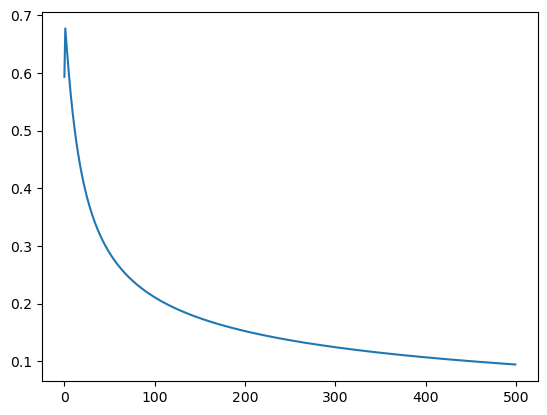

In [270]:
x=[i for i in range(len(ea))]
plt.plot(x,ea)

In [240]:
X=3.5
Y= 1 / (1 + np.exp(-(b0 + b1 * X)))

In [241]:
Y

0.3920981247960804

In [242]:
X=7.5
Y= 1 / (1 + np.exp(-(b0 + b1 * X)))

In [243]:
Y

0.9936359140541493

In [244]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', max_iter=1000)
model.fit(df[['X']].values, df['Y'].values)

LogisticRegression(max_iter=1000)

In [245]:
model.predict([[3.5]])

array([0])

In [246]:
model.predict([[7.5]])

array([1])

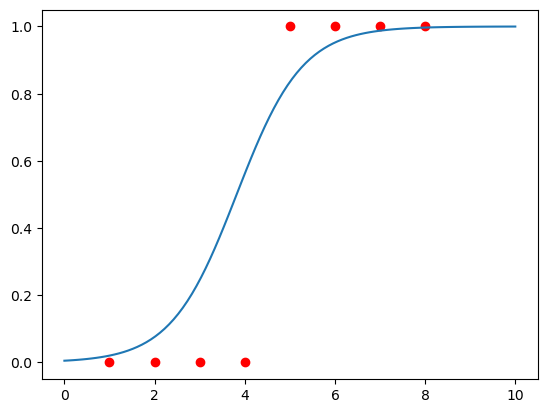

In [247]:
X=np.linspace(0,10,100)
plt.scatter(df['X'], df['Y'], color='red', label='Data points')
plt.plot(X,1 / (1 + np.exp(-(b0 + b1 *X))))

# Q3

In [248]:
data = {
    'X1': [4, 2, 1, 3, 1, 6],
    'X2': [1, 8, 0, 2, 4, 7],
    'Y': [2, -14, 1, -1, -7, -8]
}

# Create DataFrame
df = pd.DataFrame(data)


In [249]:
df

,X1,X2,Y
0,4,1,2
1,2,8,-14
2,1,0,1
3,3,2,-1
4,1,4,-7
5,6,7,-8


In [250]:

for i in range (len(df)):
    print()
    if df['Y'][i]<=0:
        df['Y'][i]=0
    else:
        df['Y'][i]=1

In [251]:
df

,X1,X2,Y
0,4,1,1
1,2,8,0
2,1,0,1
3,3,2,0
4,1,4,0
5,6,7,0


In [252]:
b0 = 0.0
b1 = 0.0
b2 = 0.0
learning_rate = 0.01
iterations = 1000

log_losses = []

for iteration in range(iterations):
    for i, j, k in zip(df['X1'], df['X2'], df['Y']):
        predict = 1 / (1 + np.exp(-(b0 + b1 * i + b2 * j)))
        error = predict - k
        
        b0 -= learning_rate * error
        b1 -= learning_rate * error * i
        b2 -= learning_rate * error * j

    predictions = 1 / (1 + np.exp(-(b0 + b1 * df['X1'] + b2 * df['X2'])))
    log_loss = -np.mean(df['Y'] * np.log(predictions) + (1 - df['Y']) * np.log(1 - predictions))
    log_losses.append(log_loss)


print(f"Optimized b0: {b0}")
print(f"Optimized b1: {b1}")
print(f"Optimized b2: {b2}")

Optimized b0: 1.095068197708901
Optimized b1: 1.2583970172688976
Optimized b2: -3.5152667466687326


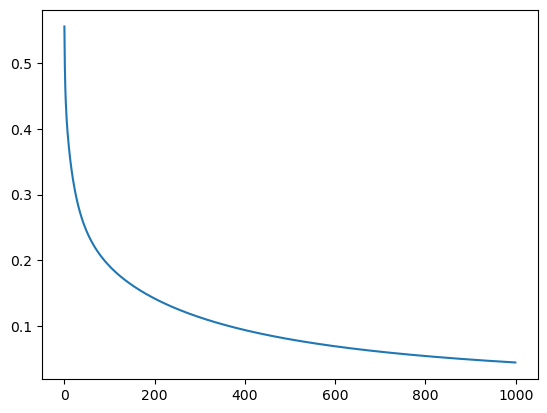

In [253]:
x=[i for i in range(len(log_losses))]
plt.plot(x,log_losses)